In [24]:
import math
import sympy as sym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
h = sym.Symbol('h') # heigth
r = sym.Symbol('r') # Radius
pi = sym.Symbol('pi') # pi number = 3.14
v = sym.Symbol('v') # volume
b = sym.Symbol('b')
g = sym.Symbol('g')

In [83]:
# volume formule for Cylinders tank

Cyl_V = pi * (r ** 2) * h
Cyl_V

h*pi*r**2

In [118]:
Cyl_V.subs(pi,math.pi).subs(h,20).subs(r,50.3)

158970.243138420

In [84]:
# Area forlmula for Cylinders tank

Area_Floor = pi * (r ** 2)
Area_Ceil  = pi * (r ** 2)
Area_Wall = pi * 2 * r * h

Area_total = Area_Floor + Area_Ceil + Area_Wall
Area_total

2*h*pi*r + 2*pi*r**2

In [85]:
#our targer is 1 milion barrel oil tank

#converting 1 milion barrel oil to cubic meter

# 1 barrel oil = 158.987 L
# 1000 L = 1 m^3

target_v = (10 ** 6) * 158.987 * (10**-3) 

print('target volume is {} '.format(target_v))

target volume is 158987.0 


In [100]:
Force_floor = b * g * h * Area_Floor
Force_floor

b*g*h*pi*r**2

In [101]:
Force_wall  = (b * g * h)/2 * h * 2 * pi * r
Force_wall

b*g*h**2*pi*r

In [102]:
total_force = Force_wall + Force_floor
total_force

b*g*h**2*pi*r + b*g*h*pi*r**2

In [29]:
# definig h according to v and r 

h_v_r = v/(pi * (r ** 2))
h_v_r

v/(pi*r**2)

In [103]:
t_force_r = total_force.subs(h, h_v_r)
t_force_r

b*g*v + b*g*v**2/(pi*r**3)

In [104]:
dFdr = sym.diff(Force_wall.subs(h,h_v_r),r)
dFdr

-3*b*g*v**2/(pi*r**4)

In [97]:
sym.solveset(dFdr.subs(g,9.8).subs(v,target_v).subs(b,1).subs(pi, math.pi))

EmptySet()

In [31]:
# Area accorind to v and r

A_v_r = Area_total.subs(h, h_v_r)
A_v_r

2*pi*r**2 + 2*v/r

In [33]:
# drevitive A according to r

dAdr = sym.diff(A_v_r, r)
dAdr

4*pi*r - 2*v/r**2

In [58]:
# finding the best r for minimum Area
# R = best R
l = list(sym.solveset(dAdr.subs(v, target_v).subs(pi,math.pi), r))
R = l[0]
R

29.3580529015881

In [80]:
H = h_v_r.subs(r,R).subs(v, target_v).subs(pi, math.pi)
H

58.7161058031762

In [119]:
# ploting Area and heigh according to r
Rs = np.linspace(10, 2.5*float(R), 500)
df = pd.DataFrame({'r':Rs})
df['h'] = df['r'].apply(lambda x: h_v_r.subs(r,x).subs(v, target_v).subs(pi, math.pi))
df['A_t'] = df['r'].apply(lambda x: A_v_r.subs(r,x).subs(v, target_v).subs(pi, math.pi))


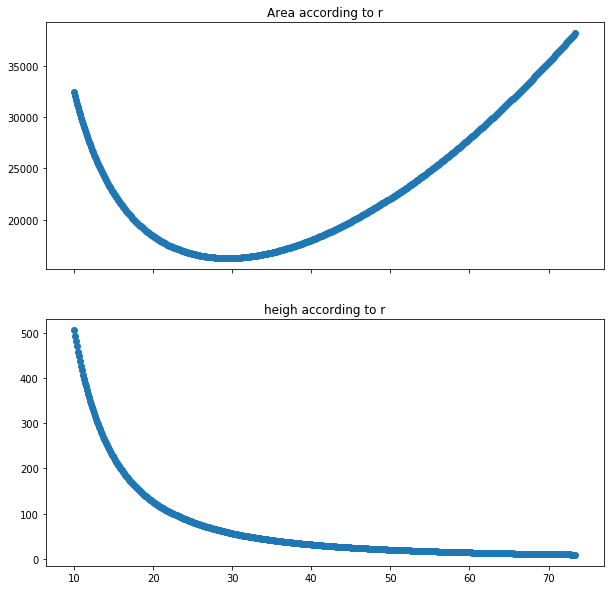

In [120]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(10,10))

ax1.set_title('Area according to r')
ax1.scatter(df['r'], df['A_t'])

ax2.set_title('heigh according to r')
ax2.scatter(df['r'], df['h'])